## Setup
Loading Libraries




In [156]:
import random
import numpy as np
import pandas as pd
from sklearn import preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, RepeatedStratifiedKFold,KFold
from sklearn import svm
from sklearn.svm import SVR
from sklearn.naive_bayes import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter
from time import time
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, BaggingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
print("Libraries imported.")

Libraries imported.


##Loading the dataset

In [157]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/train_set.tsv'
dataset = pd.read_csv(filename, sep='\t', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Not Normalized Dataset

In [152]:
names = dataset.columns
X_all= dataset.iloc[:,:-2]
y_all = dataset.iloc[:,-2]
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X_all)
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,29.393295,-73393.079252,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,-254.404983,54579.884869,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,-184.529893,82065.359024,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,159.756158,60575.192521,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,-29.044969,-52711.027260,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700


##Normalized Dataset between 0 and 1

In [249]:
scaler = preprocessing.MinMaxScaler()#tra 0 e 1
d = scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-2]
y_all = dataset.iloc[:,-2]
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,0.003575,0.167803,0.161493,0.508819,0.985962,0.202369,0.721751,0.234008,0.174139,0.482895,...,0.559171,0.116869,0.723264,0.255023,0.105060,0.693768,0.915946,0.482930,0.708205,0.694046
1,0.640368,0.422673,0.741763,0.165028,0.229878,0.010242,0.415316,0.415609,0.666341,0.787835,...,0.004367,0.771184,0.339956,0.686534,0.586095,0.287196,0.113537,0.337113,0.488949,0.271890
2,0.292795,0.407523,0.804773,0.907133,0.386911,0.849959,0.683186,0.396191,0.192501,0.429573,...,0.140968,0.911715,0.397539,0.151020,0.628936,0.322092,0.906957,0.786650,0.895128,0.553126
3,0.576375,0.245460,0.418722,0.271772,0.073294,0.197715,0.336344,0.786404,0.843621,0.441296,...,0.814021,0.801837,0.722266,0.645184,0.357215,0.686300,0.138116,0.220912,0.196630,0.589351
4,0.368716,0.817790,0.225677,0.846167,0.177602,0.817414,0.220479,0.809164,0.436669,0.530544,...,0.444929,0.222615,0.642145,0.399705,0.611108,0.909877,0.759109,0.138896,0.817285,0.611065


##Normalized Dataset with unit Vector

In [273]:
names = dataset.columns
X_all = dataset.iloc[:,:-2]
y_all = dataset.iloc[:,-2]
X_all=preprocessing.normalize(X_all)
class_names = np.array(["0","1","2","3","4"])
print(X_all)

[[ 1.26002449e-07 -2.90008713e-01 -2.76067435e-01 ... -3.64849862e-05
   1.92449290e-01  1.54488020e-01]
 [ 1.92161731e-05 -8.22535347e-02  2.26593200e-01 ... -3.94005625e-04
  -1.34032803e-02 -2.29194401e-01]
 [ 9.08164239e-06 -9.81153217e-02  2.91041570e-01 ...  7.27972898e-04
   3.89400083e-01  3.00332772e-02]
 ...
 [ 3.85009397e-06 -9.72927701e-02  1.73281789e-01 ... -9.03084955e-04
  -1.76928062e-01 -3.48942887e-01]
 [ 2.15362211e-05  2.38109318e-01 -1.58388959e-01 ... -5.47289839e-04
  -1.93960240e-01  1.07885589e-03]
 [ 7.03015488e-06 -9.78493862e-02 -3.33838771e-01 ...  1.15772278e-03
  -2.49503674e-01  2.90189974e-01]]


##Normalized test with mean removal and variance scaling

In [175]:
scaler = preprocessing.StandardScaler()
d=scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-2]
y_all = dataset.iloc[:,-2]
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,-1.716449,-1.622653,-1.605434,0.028033,1.528305,-1.120844,0.848169,-0.934516,-1.458329,-0.080881,...,0.149195,-1.430235,0.800377,-0.866545,-1.699431,0.821942,1.219419,-0.035688,0.782818,0.668860
1,0.517720,-0.404497,1.192812,-1.041943,-0.803886,-1.863554,-0.341506,-0.293685,0.855370,1.341817,...,-1.599624,1.148769,-0.688636,0.649873,0.354368,-0.916189,-1.201367,-0.507752,-0.063923,-0.951171
2,-0.701730,-0.476909,1.496668,1.267701,-0.319508,1.382562,0.698446,-0.362207,-1.372011,-0.329652,...,-1.169040,1.702676,-0.464945,-1.232036,0.537281,-0.767010,1.192301,0.947566,1.504686,0.128075
3,0.293204,-1.251492,-0.364995,-0.709726,-1.286880,-1.138833,-0.648101,1.014773,1.688712,-0.274959,...,0.952515,1.269591,0.796500,0.504560,-0.622844,0.790017,-1.127215,-0.883940,-1.192821,0.267092
4,-0.435363,1.483968,-1.295918,1.077958,-0.965134,1.256749,-1.097924,1.095090,-0.224250,0.141425,...,-0.210913,-1.013435,0.485260,-0.358106,0.461165,1.745826,0.746258,-1.149457,1.204069,0.350421


## Normalized test with RobustScaler

In [143]:
scaler = preprocessing.RobustScaler().fit(dataset)
d=scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-2]
y_all = dataset.iloc[:,-2]
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,-1.013418,-1.024432,-1.092455,0.006052,0.771178,-0.677074,0.504303,-0.580127,-1.003186,-0.044063,...,0.051787,-0.842565,0.437358,-0.457888,-1.056806,0.499256,0.574846,0.002500,0.428784,0.364549
1,0.299283,-0.236641,0.792996,-0.536874,-0.384643,-1.104799,-0.180816,-0.188856,0.550774,0.856713,...,-0.835904,0.685923,-0.388408,0.419413,0.215760,-0.553222,-0.587333,-0.245736,-0.039274,-0.544360
2,-0.417213,-0.283471,0.997733,0.635083,-0.144588,0.764636,0.418080,-0.230693,-0.945212,-0.201572,...,-0.617342,1.014205,-0.264356,-0.669337,0.329096,-0.462891,0.561827,0.519547,0.827816,0.061145
3,0.167367,-0.784399,-0.256651,-0.368300,-0.624012,-0.687434,-0.357381,0.610047,1.110475,-0.166943,...,0.459548,0.757530,0.435208,0.335344,-0.389736,0.479925,-0.551735,-0.443555,-0.663302,0.139140
4,-0.260707,0.984643,-0.883904,0.538804,-0.464557,0.692180,-0.616429,0.659086,-0.174336,0.096689,...,-0.131002,-0.595542,0.262602,-0.163738,0.281933,1.058690,0.347689,-0.583178,0.661642,0.185891


##Plotting some relevant information of the dataset

Percentage of zero-collision 0.538000
Input shape: (1000, 35)
Output shape: (1000,)
Number of attributes/features: 35
Number of classes: 5 ['0' '1' '2' '3' '4']
Number of samples: 1000


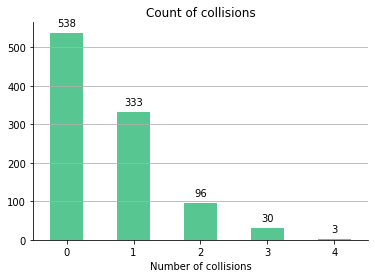

In [128]:
cont=0
for i in range(0,len(y_all)):
  if y_all[i] == 0:
    cont += 1
print("Percentage of zero-collision %f" %(cont/len(y_all)))

print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

fig = plt.figure()
ax = fig.add_subplot(111)
dataset['num_collisions'].value_counts().plot(kind='bar', color = '#1fb46c', alpha=0.75, grid=True)
plt.xlabel('Number of collisions')
plt.title('Count of collisions')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()+25), ha='center', va='center')

##Dividing hte dataset in Training and Test set and showing how the Test set is composed

Training set length: 670 
Testing set length: 330


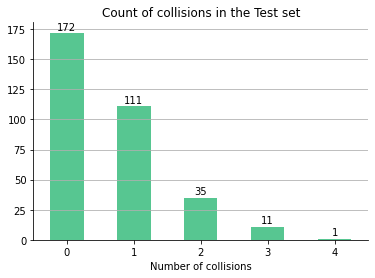

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, 
                                                    random_state=1)#0.10, 6 per avere 2 vettori

print("Training set length: %d \nTesting set length: %d" %(X_train.shape[0],X_test.shape[0]))

fig = plt.figure()
ax = fig.add_subplot(111)
#print(y_test)
y_test.value_counts().plot(kind='bar', color = '#1fb46c', alpha=0.75, grid=True)
plt.xlabel('Number of collisions')
plt.title('Count of collisions in the Test set')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()+5), ha='center', va='center')

##Code to see if is linearly indipendent

Accuracy 0.361
              precision    recall  f1-score   support

           0      0.649     0.327     0.435       538
           1      0.459     0.318     0.376       333
           2      0.214     0.562     0.310        96
           3      0.092     0.733     0.163        30
           4      0.500     1.000     0.667         3

    accuracy                          0.361      1000
   macro avg      0.383     0.588     0.390      1000
weighted avg      0.527     0.361     0.396      1000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


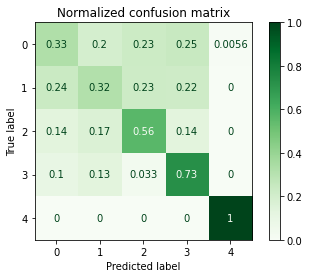

In [19]:
model= svm.SVC(kernel='linear',C=2^32,gamma='auto', degree=3, decision_function_shape='ovo', class_weight='balanced')
model.fit(X_all,y_all)
y_pred=model.predict(X_all)
acc = model.score(X_all, y_all)    
print("Accuracy %.3f" %acc) #0.337
print(classification_report(y_all, y_pred, labels=None, target_names=class_names, digits=3))
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_all, y_all,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

##Creating the model and fitting it (SVC)

In [177]:
model = svm.SVC(kernel='poly', C=2.2,degree=3, gamma='scale')
model.fit(X_train, y_train)
print(len(model.support_vectors_))

[358 222  61  19   2]
662


##Creating the Model and fitting it (Logistic regression)

In [245]:
model=LogisticRegression(solver='newton-cg',
                         class_weight={0:0.2,#se ci metto 0.2 funziona meglio
                                                           1:0.3,
                                                           2:1,
                                                           3:1,
                                                           4:1},
                          C=2, penalty='l2',max_iter=100)
model.fit(X_train,y_train)

LogisticRegression(C=2, class_weight={0: 0.2, 1: 0.3, 2: 1, 3: 1, 4: 1},
                   solver='newton-cg')

##Lines of code to evaluate how the accuracy is in the training set

In [246]:
y_pred=model.predict(X_train)
acc = model.score(X_train, y_train)    
print("Accuracy %.3f" %acc)

Accuracy 0.479


##Predicting the value on the Test Set and showing some metrics

In [247]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))

              precision    recall  f1-score   support

           0      0.540     0.471     0.503       172
           1      0.312     0.216     0.255       111
           2      0.168     0.486     0.250        35
           3      0.000     0.000     0.000        11
           4      0.000     0.000     0.000         1

    accuracy                          0.370       330
   macro avg      0.204     0.235     0.202       330
weighted avg      0.404     0.370     0.375       330



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Plotting Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


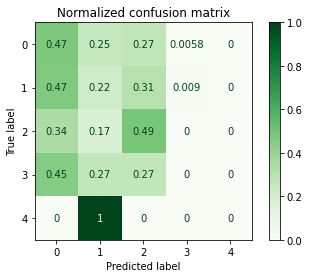

In [248]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

##Using grid serach to find the best solution for LogisticRegression

In [225]:
scoring = {"f1_weighted": "f1_weighted", "accuracy": "accuracy"}
#The first parameter is the model
grid_search_classification = GridSearchCV(model,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                            'C':np.arange(0.1,3,0.1),
                            
                            #'max_iter':np.arange(10,110,10), 
                            #'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),                           
                            },cv=2, scoring="accuracy",verbose=1,n_jobs=-1
                           )
print("Grid Search for Classification\n\n")
print(grid_search_classification.fit(X_train,y_train))


print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print(grid_search_classification)
print("Best parameter %.2f" %grid_search_classification.best_score_)

Grid Search for Classification


Fitting 2 folds for each of 29 candidates, totalling 58 fits
GridSearchCV(cv=2,
             estimator=LogisticRegression(C=2, class_weight='balanced',
                                          solver='newton-cg'),
             n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='accuracy', verbose=1)
Best classification hyper-parameters: {'C': 2.7}
GridSearchCV(cv=2,
             estimator=LogisticRegression(C=2, class_weight='balanced',
                                          solver='newton-cg'),
             n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='accuracy', verbose=1)
Best parameter 

##Showing the metrics of new solution mesured through Grid_Search

              precision    recall  f1-score   support

           0      0.508     0.180     0.266       172
           1      0.289     0.216     0.247       111
           2      0.147     0.400     0.215        35
           3      0.012     0.091     0.021        11
           4      0.000     0.000     0.000         1

    accuracy                          0.212       330
   macro avg      0.191     0.177     0.150       330
weighted avg      0.378     0.212     0.245       330



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


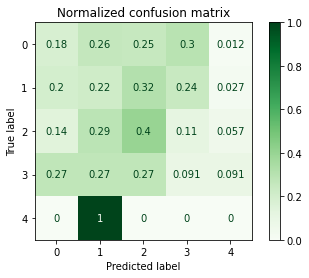

In [226]:
y_pred = grid_search_classification.predict(X_test)
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_classification, X_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

max_accuracy=0
for i in np.arange(0.1, 0.5, 0.1) :
  for j in np.arange(0.1, 0.5, 0.1) :
    for k in np.arange(0.1, 0.5, 0.1) :
      for l in np.arange(0.1, 0.5, 0.1) :
        for m in np.arange(0.1, 0.5, 0.1) :
          model=LogisticRegression(solver='newton-cg', class_weight={0:i,
                                                           1:j,
                                                           2:k,
                                                           3:l,
                                                           4:m},
                          C=1.5000000000000002, penalty='l2',max_iter=100)
          model.fit(X_train,y_train)
          model.predict(X_test)
          acc = model.score(X_test, y_test)
          if acc>max_accuracy:
            max_accuracy=acc
            I=i
            J=j
            K=k
            L=l
            M=m
print(max_accuracy)
print(I)
print(J)
print(K)
print(L)
print(M)

##GridSearch for SVC

In [181]:
grid_search_classification = GridSearchCV(model,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                               #'C':(1,10,100),
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            'degree': np.arange(1,4,1),
                            },cv=2, scoring="f1_weighted",verbose=1,n_jobs=-1
                           )
print("Grid Search for Classification\n\n")
print(grid_search_classification.fit(X_train,y_train))


print()
print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print(grid_search_classification.n_splits_)
print("Best parameter: %.2f" %grid_search_classification.best_score_)

Grid Search for Classification


Fitting 2 folds for each of 228 candidates, totalling 456 fits
GridSearchCV(cv=2, estimator=SVC(C=2.2, kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'degree': array([1, 2, 3]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='f1_weighted', verbose=1)

Best classification hyper-parameters: {'C': 1.4000000000000001, 'degree': 3, 'kernel': 'poly'}
2
Best parameter: 0.46


##Showing the metrics of new solution mesured through Grid_Search

              precision    recall  f1-score   support

           0      0.523     0.808     0.635       172
           1      0.306     0.171     0.220       111
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000        11
           4      0.000     0.000     0.000         1

    accuracy                          0.479       330
   macro avg      0.166     0.196     0.171       330
weighted avg      0.375     0.479     0.405       330



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

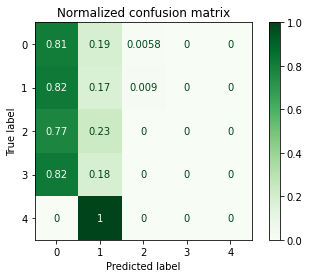

In [182]:
y_pred = grid_search_classification.predict(X_test)
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_classification, X_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

##Boosting

In [274]:
# Ensemble classifier parameters
n_estimators = [1,2,3]
classifier_name = 'S'

all_classifiers = {
    'L': [LogisticRegression, 'Logistic Regression'],
    'S': [svm.SVC, 'SVM']
    }

algorithm = 'SAMME' if classifier_name == 'S' else 'SAMME.R'
# Boosting parameters
boosting_params = {
  'learning_rate': np.random.uniform(size=5),
  'n_estimators': n_estimators,
  }
print(f"Boosting parameters:  {boosting_params}")

adaboost_classifier = AdaBoostClassifier(
    base_estimator=all_classifiers[classifier_name][0](), 
    n_estimators=3, 
    learning_rate=1.0, 
    algorithm= algorithm,
    random_state=1
    ).fit(X_train, y_train)
y_pred=adaboost_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))


cv = KFold(n_splits=2, shuffle=True, random_state=1)
grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params, 
    scoring='f1_weighted', 
    cv=cv, 
    return_train_score=False,
    verbose=0,
    refit=True
)
grid_search_boosting.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)

Boosting parameters:  {'learning_rate': array([0.44246513, 0.11438052, 0.31014191, 0.86900831, 0.96579997]), 'n_estimators': [1, 2, 3]}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.521     1.000     0.685       172
           1      0.000     0.000     0.000       111
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000        11
           4      0.000     0.000     0.000         1

    accuracy                          0.521       330
   macro avg      0.104     0.200     0.137       330
weighted avg      0.272     0.521     0.357       330

Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.4424651256445562, 'n_estimators': 1}
Best accuracy: 0.3861


Boosting Accuracy over the test set: 0.3572
              precision    recall  f1-score   support

           0      0.521     1.000     0.685       172
           1      0.000     0.000     0.000       111
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000        11
           4      0.000     0.000     0.000         1

    accuracy                          0.521       330
   macro avg      0.104     0.200     0.137       330
weighted avg      0.272     0.521     0.357       330



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

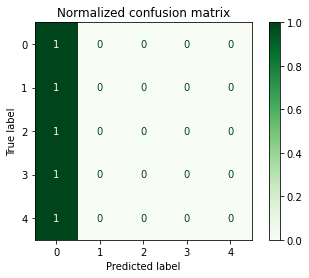

In [275]:
print("Boosting Accuracy over the test set: %.4f" %grid_search_boosting.score(X_test, y_test))
y_pred = grid_search_boosting.predict(X_test)
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Normalized confusion matrix","true")]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_boosting, X_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()